## Implementing ML Model Monitoring Pipelines

### Model Performance Drift:
**Description**: Setup a monitoring pipeline to track key performance metrics (e.g., accuracy, precision) of an ML model over time using a monitoring tool or dashboard.

📊 Performance Over Time:
   day  accuracy  drift_detected
0    1      1.00           False
1    2      1.00           False
2    3      1.00           False
3    4      0.53            True
4    5      0.47            True


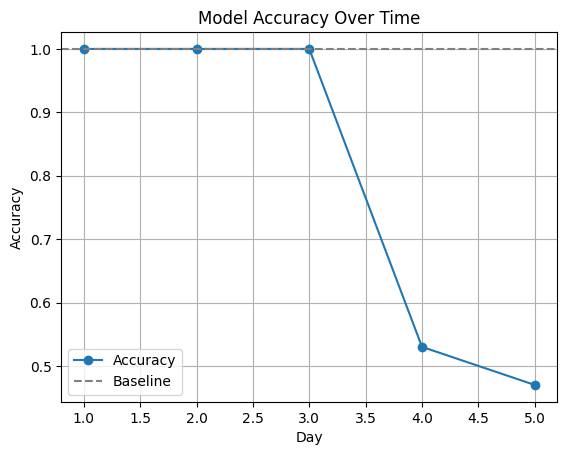

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Simulated data (true labels and model predictions over 5 time points)
np.random.seed(42)

def generate_data(size, drift=False):
    y_true = np.random.choice([0, 1], size=size)
    if drift:
        y_pred = np.random.choice([0, 1], size=size, p=[0.7, 0.3])  # lower accuracy
    else:
        y_pred = y_true.copy()  # high accuracy
    return y_true, y_pred

metrics = []

for day in range(1, 6):
    # Simulate drift starting from day 4
    y_true, y_pred = generate_data(100, drift=(day >= 4))
    acc = accuracy_score(y_true, y_pred)
    metrics.append({'day': day, 'accuracy': acc})

# Step 2: Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Step 3: Detect drift
baseline_accuracy = metrics_df['accuracy'][:3].mean()  # baseline from first 3 days
drift_threshold = 0.05  # drop >5% triggers drift alert
metrics_df['drift_detected'] = metrics_df['accuracy'] < (baseline_accuracy - drift_threshold)

# Step 4: Display results
print("📊 Performance Over Time:")
print(metrics_df)

# Step 5: Plot
plt.plot(metrics_df['day'], metrics_df['accuracy'], marker='o', label='Accuracy')
plt.axhline(y=baseline_accuracy, color='gray', linestyle='--', label='Baseline')
plt.title('Model Accuracy Over Time')
plt.xlabel('Day')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Feature Distribution Drift:
**Description**: Monitor the distribution of your input features in deployed models to detect any significant shifts from training data distributions.

📊 Feature Distribution Drift Check:
   batch  ks_stat       p_value  drift_detected
0      1    0.084  1.832715e-01           False
1      2    0.057  6.372310e-01           False
2      3    0.581  4.175048e-53            True
3      4    0.756  5.451060e-96            True


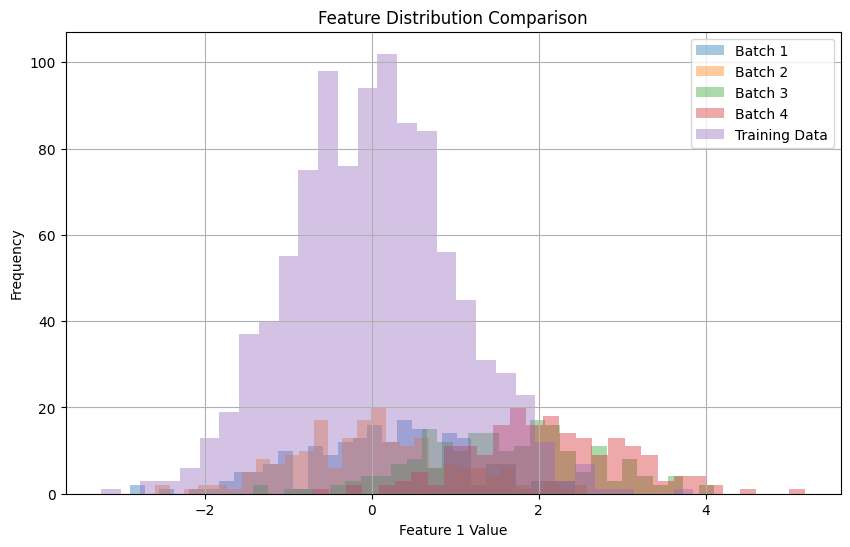

In [2]:
# write your code from here
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Step 1: Simulate training data and incoming data
np.random.seed(42)
train_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=1000)
})

# Simulated live data (drift introduced in batch 3 onward)
incoming_batches = [
    np.random.normal(loc=0, scale=1, size=200),   # no drift
    np.random.normal(loc=0, scale=1, size=200),   # no drift
    np.random.normal(loc=1.5, scale=1, size=200), # drift
    np.random.normal(loc=2.0, scale=1, size=200), # drift
]

# Step 2: Check distribution drift using KS test
ks_results = []
for i, batch in enumerate(incoming_batches, start=1):
    stat, p_value = ks_2samp(train_data['feature_1'], batch)
    drift_detected = p_value < 0.05
    ks_results.append({'batch': i, 'ks_stat': stat, 'p_value': p_value, 'drift_detected': drift_detected})

# Step 3: Output results
ks_df = pd.DataFrame(ks_results)
print("📊 Feature Distribution Drift Check:")
print(ks_df)

# Step 4: Visualize drift
plt.figure(figsize=(10, 6))
for i, batch in enumerate(incoming_batches, start=1):
    plt.hist(batch, bins=30, alpha=0.4, label=f'Batch {i}')
plt.hist(train_data['feature_1'], bins=30, alpha=0.4, label='Training Data')
plt.title('Feature Distribution Comparison')
plt.xlabel('Feature 1 Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Anomaly Detection in Predictions:
**DEscription**: Implement an anomaly detection mechanism to flag unusual model
predictions. Simulate anomalies by altering input data.

📊 Detected Prediction Anomalies:
    prediction  index   z_score  anomaly
92         1.2     92  3.429937     True
95         1.3     95  3.923671     True


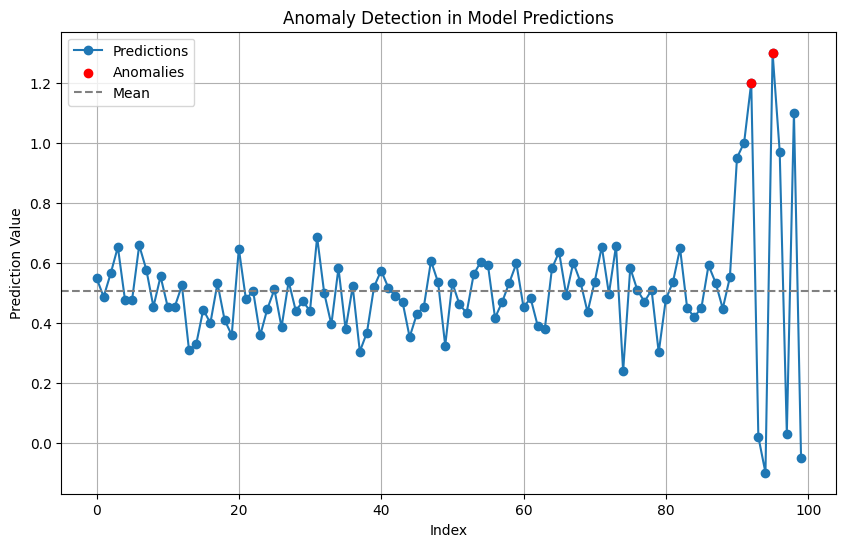

In [3]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate regular predictions
np.random.seed(42)
normal_preds = np.random.normal(loc=0.5, scale=0.1, size=90)  # Normally distributed predictions

# Step 2: Inject anomalies (outliers)
anomalies = np.array([0.95, 1.0, 1.2, 0.02, -0.1, 1.3, 0.97, 0.03, 1.1, -0.05])
predictions = np.concatenate([normal_preds, anomalies])

# Step 3: Convert to DataFrame
df = pd.DataFrame({'prediction': predictions})
df['index'] = df.index

# Step 4: Anomaly detection using z-score
mean = df['prediction'].mean()
std = df['prediction'].std()
df['z_score'] = (df['prediction'] - mean) / std
df['anomaly'] = df['z_score'].abs() > 3  # flag anomalies outside ±3 std dev

# Step 5: Display results
print("📊 Detected Prediction Anomalies:")
print(df[df['anomaly']])

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['index'], df['prediction'], label='Predictions', marker='o')
plt.scatter(df[df['anomaly']]['index'], df[df['anomaly']]['prediction'], color='red', label='Anomalies', zorder=5)
plt.axhline(mean, color='gray', linestyle='--', label='Mean')
plt.title('Anomaly Detection in Model Predictions')
plt.xlabel('Index')
plt.ylabel('Prediction Value')
plt.legend()
plt.grid(True)
plt.show()
